In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/titanic.csv');

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#we need to predict if a passenger has suvived or not

#Visualization and analysis

In [ ]:
#lets look for missing valeus
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

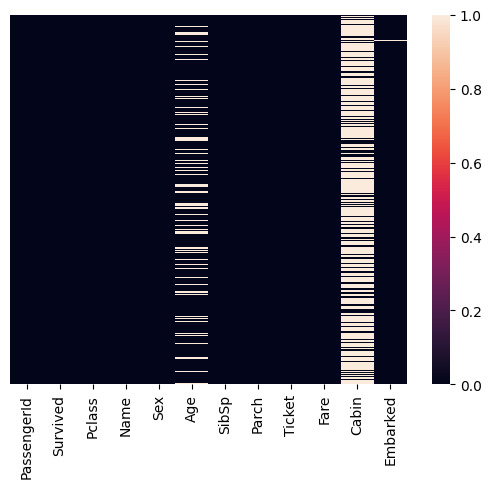

In [ ]:
#we can use heatmap to see null values
sns.heatmap(df.isnull(), yticklabels = False) #in white colour are the rows which have null values

In [ ]:
#cabin has lot of null values so it wont be a good idea to keep it we can drop it or say replace it with another boolean column as "cabin known"
df['Age'].isnull().value_counts()


Age
False    714
True     177
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

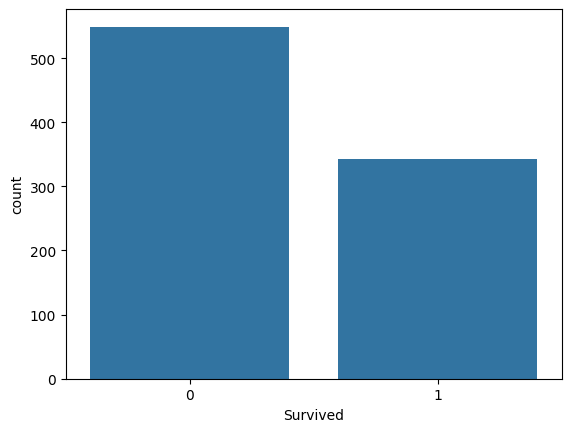

In [ ]:
#approximately 20 percent of ages have null values
#so we can consider replacing them
sns.countplot(x='Survived', data = df)

<Axes: xlabel='Survived', ylabel='count'>

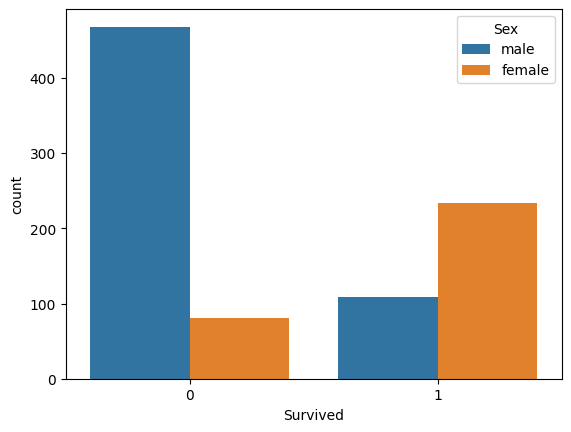

In [ ]:
sns.countplot(x='Survived', hue = 'Sex', data = df)
#more women survived than men because they were rescued first

<Axes: xlabel='Survived', ylabel='count'>

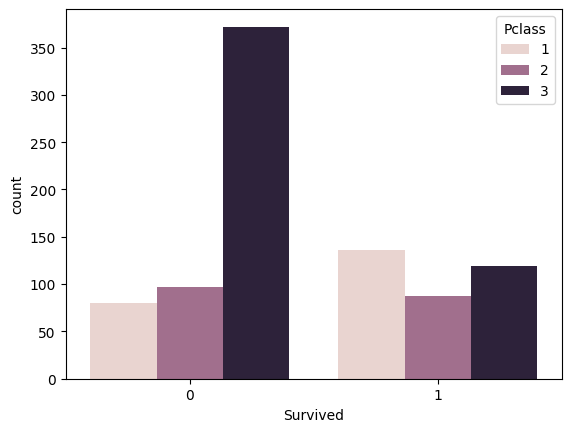

In [ ]:
sns.countplot(x='Survived', hue = 'Pclass', data = df)
#passenger class 3 a lot of people died

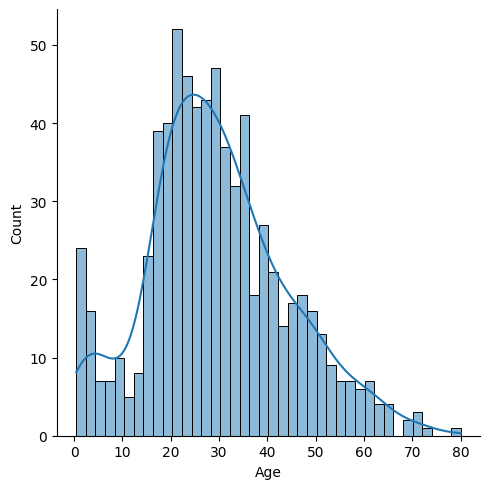

In [ ]:
#we want to analyse what kind of distribution age follows
sns.displot(df['Age'].dropna(), kde = True, bins=40)

<Axes: >

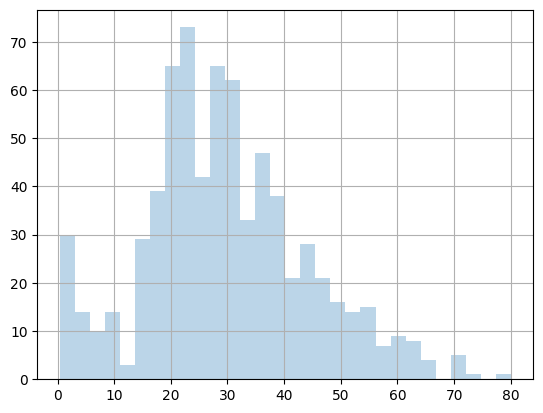

In [ ]:
df['Age'].hist(bins = 30, alpha = 0.3)

<Axes: xlabel='SibSp', ylabel='count'>

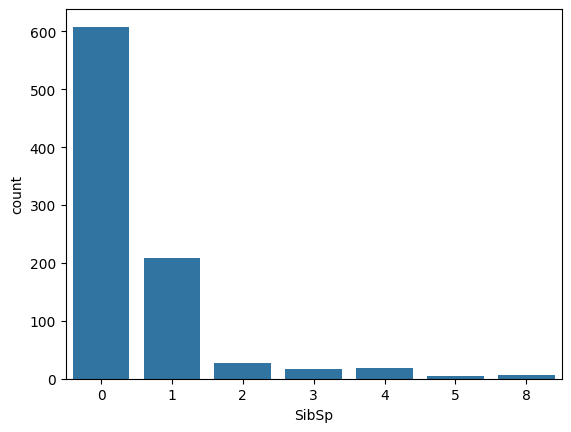

In [ ]:
sns.countplot(x = 'SibSp', data = df)
#SibSp represents sibling or spouse count
#so we can see that majority people dont have a sibling or spouse
# 25 percent of them have 1 sibling or can be a spouse

<Axes: >

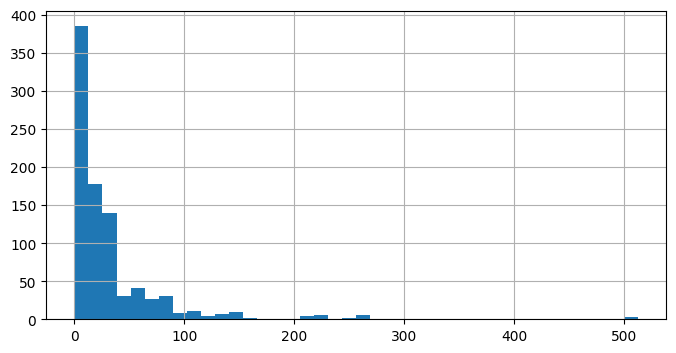

In [ ]:
df['Fare'].hist(bins = 40, figsize=(8,4))

#Data Cleaning

In [ ]:
#we dont want to drop rows with missing age values so we'll try to replace them

<ipython-input-79-feda906751f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Pclass', y='Age', data=df, palette = 'rainbow')


<Axes: xlabel='Pclass', ylabel='Age'>

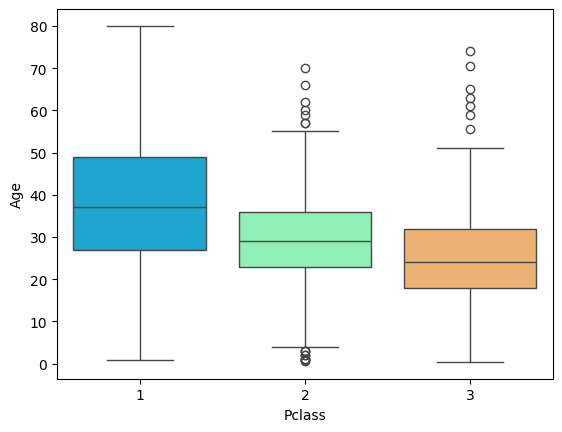

In [ ]:
#i'll create a boxplot with ages for different classes of passengers
sns.boxplot(x = 'Pclass', y='Age', data=df, palette = 'rainbow')

In [ ]:
def impute_age(cols):
  age = cols[0]
  pclass=cols[1]

  if pd.isnull(age):

    if pclass == 1:
      return 37
    elif pclass ==2:
      return 29
    else:
      return 24
  else:
    return age

In [ ]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)

<Axes: >

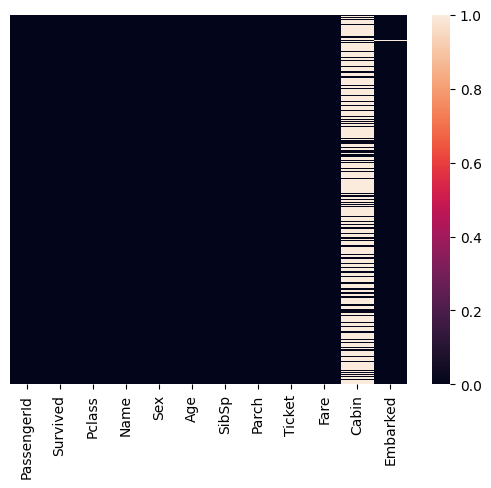

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False )

In [ ]:
#lets drop cabin column

df.drop('Cabin', axis = 1, inplace=True)

<Axes: >

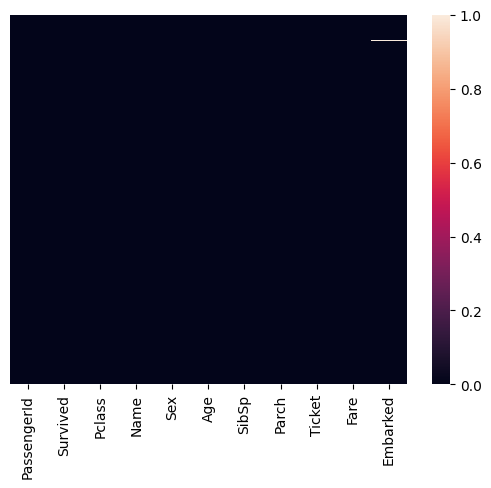

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False )

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#now that we've dealt with missing values we need to deal with the categorical variables
#also we can see that passengerID , name and ticket columns are not exactly relevan for classification task

#lets first deal with categorical variables

pd.get_dummies(df['Sex'], drop_first=True, dtype='float64')

,male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
886,1.0
887,0.0
888,0.0
889,1.0


In [ ]:
pd.get_dummies(df['Embarked'], drop_first=True,dtype='float64')

,Q,S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,0.0,1.0
888,0.0,1.0
889,0.0,0.0


In [ ]:
sex=pd.get_dummies(df['Sex'], drop_first=True,dtype='float64')
embark=pd.get_dummies(df['Embarked'], drop_first=True,dtype='float64')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df.drop(['Name','Ticket','Sex', 'Embarked'], axis = 1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [ ]:
df.drop(['Name','Ticket','Sex', 'Embarked'], axis = 1, inplace =True)

In [ ]:
df  = pd.concat([df, sex, embark], axis=1)

In [ ]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0,0.0,1.0
887,888,1,1,19.0,0,0,30.0000,0.0,0.0,1.0
888,889,0,3,24.0,1,2,23.4500,0.0,0.0,1.0
889,890,1,1,26.0,0,0,30.0000,1.0,0.0,0.0


In [ ]:
#now we'll go ahead with building our model
#dependent variable is Survived
df.drop('Survived', axis = 1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,3,35.0,0,0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1.0,0.0,1.0
887,888,1,19.0,0,0,30.0000,0.0,0.0,1.0
888,889,3,24.0,1,2,23.4500,0.0,0.0,1.0
889,890,1,26.0,0,0,30.0000,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived', axis = 1), df['Survived'], test_size= 0.30, random_state =101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
acc = confusion_matrix(y_test, predictions)
acc

array([[133,  21],
       [ 42,  72]])

In [ ]:
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7649253731343284